<a href="https://colab.research.google.com/github/rajeshpahari/Deep-Learning/blob/main/Torch_Multi_Variate_classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate classification

In [1]:
#Import Libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns

from IPython import display
display.set_matplotlib_formats('svg')

In [2]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#sns.pairplot(iris,hue='species')

In [4]:
#Organize data
data=torch.tensor(iris[iris.columns[0:4]].values).float()

#Transform Species to a number
labels=torch.zeros(len(data),dtype=torch.long)
labels[iris.species=='versicolor']=1
labels[iris.species=='virginica']=2
# labels
# labels.unique()



In [5]:
#iris.species.unique()

In [6]:
#########Create The ANN Model

#Model Architechture
ANNiris=nn.Sequential(
    nn.Linear(4,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,3)

)

#Lossfunction
lossfunc=nn.CrossEntropyLoss()

#Optimizer
optimizer=torch.optim.SGD(ANNiris.parameters(),lr=.02)





In [7]:
####Train the Model
numepochs=1000

#initialize loss
losses=torch.zeros(numepochs)
ongoingACC=[]

#Traning Loop

for epochi in range(numepochs):

  yHat=ANNiris(data)

  #compute Loss
  loss=lossfunc(yHat,labels)
  losses[epochi]=loss

  #Backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



  #Compute Accuracy
  matches=torch.argmax(yHat,axis=1)==labels
  matchMumeric=matches.float()
  accuracyPCT=100*torch.mean(matchMumeric)
  ongoingACC.append(accuracyPCT)


#final forward pass
pred=ANNiris(data)

predlabels=torch.argmax(pred,axis=1)
totACC=100*torch.mean((predlabels==labels).float())










In [8]:
totACC

tensor(98.)

In [9]:
#yHat[1,:]
#torch.argmax(yHat,axis=1)

Total Accuracy 98%: 


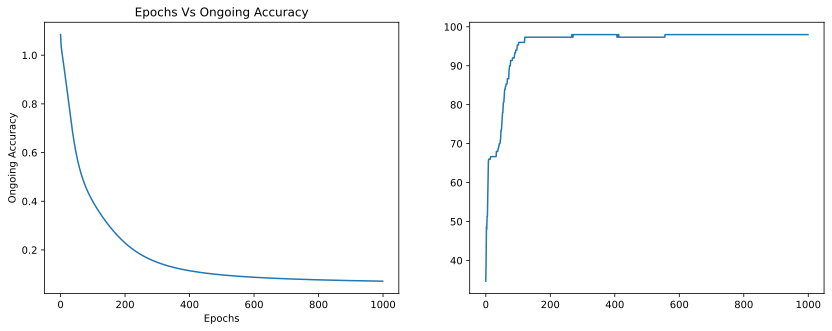

In [10]:
#Visualize result

print('Total Accuracy %g%%: ' %totACC)

fig,ax=plt.subplots(1,2,figsize=(14,5))

ax[0].plot(losses.detach())
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Epochs Vs Loss')



ax[1].plot(ongoingACC)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Ongoing Accuracy')
ax[0].set_title('Epochs Vs Ongoing Accuracy')

plt.show()

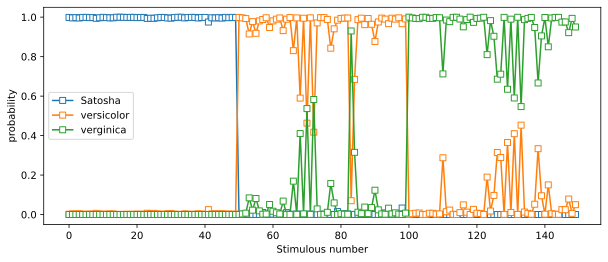

In [18]:
#Plot Raw Model output
fig=plt.figure(figsize=(10,4))
sm=nn.Softmax(1)
plt.plot(sm(yHat.detach()),'s-',markerfacecolor='w')
plt.xlabel('Stimulous number')
plt.ylabel('probability')
plt.legend(['Satosha','versicolor','verginica'])
plt.show()
